In [2]:
%matplotlib inline
import numpy as np
from scipy.special import sici
import matplotlib.pylab as plt
from scipy.integrate import quad, trapz

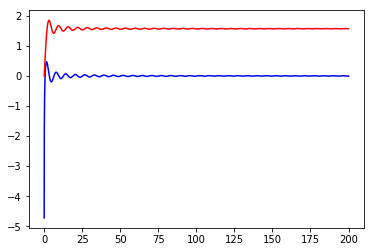

In [3]:
k_limit = 200
steps = 40001
k = np.linspace(0,k_limit,steps)
d = k_limit/steps
e = sici(k)
f_real = e[1]
f_imag = e[0]
plt.plot(k,f_real,"b")
plt.plot(k,f_imag,"r")

/Users/hstrey/miniconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/hstrey/miniconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


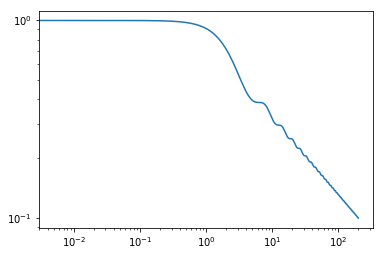

In [4]:
prefactor = 1*np.pi/8
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
plt.loglog(k,er)

[-0.39311674 -0.22467098]


/Users/hstrey/miniconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/hstrey/miniconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


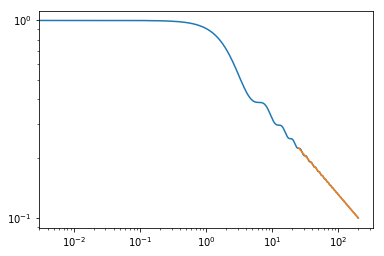

In [5]:
logk = np.log(k)
loger = np.log(er)
k_limit = 5000
p=np.polyfit(logk[k_limit:],loger[k_limit:],1)
print(p)
erfit = np.exp(p[1])*k**p[0]
plt.loglog(k,er)
plt.loglog(k[k_limit:],erfit[k_limit:])

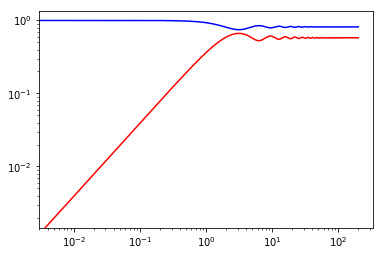

In [6]:
plt.loglog(k,ei1,"b")
plt.loglog(k,ei2,"r")

(80001,)
(80001,)


Text(0, 0.5, 'p(I)')

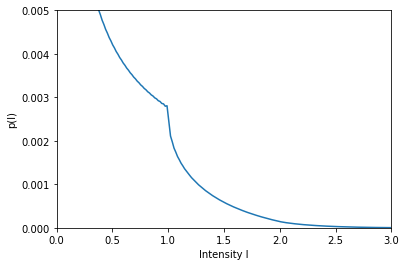

In [59]:
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.005))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
#plt.savefig("pIanalytic5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [51]:
fc_fft = np.fft.rfft(np.real(cf_fft))
print(fc_fft,fc_fft.shape)
print(fc,fc.shape)

[1.        +0.00000000e+00j 0.99999781+9.81743300e-04j
 0.99998905+9.81716877e-04j ... 0.0811002 -4.97666031e-07j
 0.08110028-4.95461884e-07j 0.08110036-4.93252567e-07j] (40001,)
[1.        +0.00000000e+00j 0.99999562-1.96348660e-03j
 0.99998247-3.92692035e-03j ... 0.08110024-5.74000469e-02j
 0.08110032-5.73990560e-02j 0.0811004 -4.93252567e-07j] (40001,)


(80000,) (40001,)


Text(0, 0.5, 'p(I)')

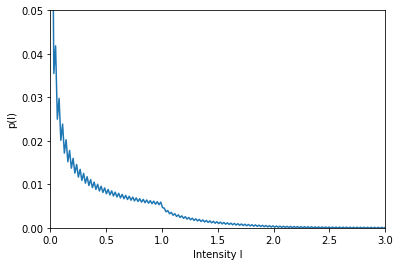

In [50]:
# need to find the proper way of doing an rfft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc = er*ei1-1j*er*ei2
fc[-1] = np.real(fc[-1])+1j*np.imag(fc_fft[-1])
cf_rfft = np.fft.irfft(fc)
print(cf_rfft.shape,fc.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_rfft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.05))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
#plt.savefig("pIanalytic5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [9]:
# normalization
print(np.real(cf_fft[:steps]).mean()*freq[steps-1])

0.0019430645139605638


In [10]:
# normalization
print(trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))

0.0008931679662339015
